In [195]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [196]:
df = pd.read_csv("Dataset.csv")

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [198]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [199]:
df.duplicated().sum()

np.int64(0)

In [200]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [201]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [202]:
#group by city and avergae cost

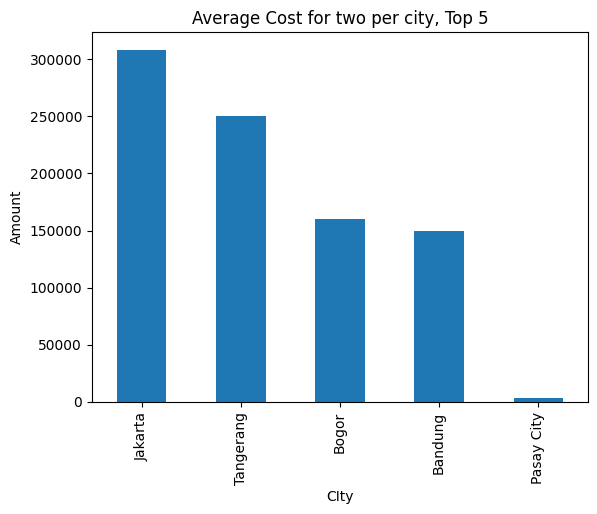

In [203]:
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind="bar")
plt.title("Average Cost for two per city, Top 5")
plt.xlabel("CIty")
plt.ylabel("Amount")

plt.show()

In [204]:
#cusines and total votes

In [205]:
data = df.groupby("Cuisines")["Votes"].sum().reset_index()

In [206]:
data[data["Votes"] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


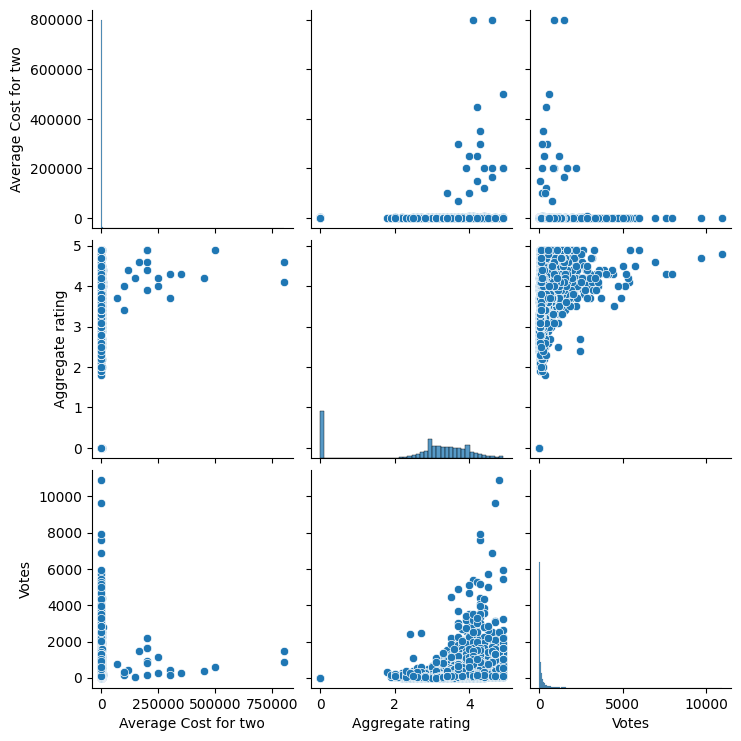

In [207]:
sns.pairplot(df[["Average Cost for two","Aggregate rating","Votes"]])

In [208]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

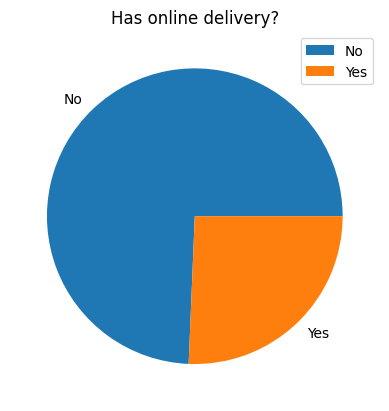

In [209]:
df["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("Has online delivery?")
plt.ylabel("")
plt.legend()
plt.show

In [210]:
df[["Aggregate rating","Rating text"]].sort_values(by="Aggregate rating",ascending=True).head(7000)

,Aggregate rating,Rating text
5544,0.0,Not rated
30,0.0,Not rated
7281,0.0,Not rated
7282,0.0,Not rated
7283,0.0,Not rated
...,...,...
5178,3.6,Good
5181,3.6,Good
5185,3.6,Good
1233,3.6,Good


In [211]:
df = df[df["Rating text"] != "Not rated"]

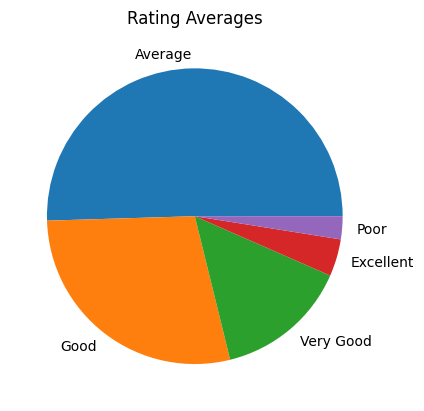

In [212]:
df["Rating text"].value_counts().plot(kind="pie")
plt.title("Rating Averages")
plt.ylabel("")
plt.show()

In [213]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [214]:
X = df[["Average Cost for two", "Has Table booking", "Has Online delivery", "Price range"]]

In [215]:
#Above 2 below 2.5      poor
#Above 2.5 below 3.5    Average
#Above 3 below 4.0      Good
#Above 4 below 4.5      Very Good
#Above 4.5              Excelent

In [216]:
Y = df[["Aggregate rating"]]

In [217]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [218]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [219]:
X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])

C:\Users\Elston\AppData\Local\Temp\ipykernel_18072\3860357707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])


In [220]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [221]:
X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])

C:\Users\Elston\AppData\Local\Temp\ipykernel_18072\3223307020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])


In [222]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [223]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [224]:
#Online Delivery , table booking
# 0 =no, 1=Yes

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [226]:
X = scaler.fit_transform(X)

In [227]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]],
      shape=(7403, 4))

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [230]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [231]:
def modelresults(predictions):
    print("Mean Absolute Error on model is {}".format(mean_absolute_error(Y_test,predictions)))
    print("Root mean Squared Errorr on model is {}".format(np.sqrt(mean_squared_error(Y_test,predictions))))


In [232]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [233]:
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [234]:
predictionsfromlr = lr.predict(X_test)

In [235]:
modelresults(predictionsfromlr)

Mean Absolute Error on model is 0.4002824888475065
Root mean Squared Errorr on model is 0.5014886890075557


In [236]:
predictionsfromlr

array([[3.15453686],
       [3.79715043],
       [3.15460005],
       ...,
       [4.02747832],
       [3.15453686],
       [3.68884137]], shape=(1481, 1))

In [237]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [238]:
svrmodel = SVR()

In [239]:
param_gridsvr = {"C" : [0.1,0.5], "kernel" : ["Linear", "poly"], "degree" : [2]}

In [240]:
gridsvr = GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(X_train,Y_train)

c:\Users\Elston\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Elston\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Elston\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Elston\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: D

,estimator,SVR()
,param_grid,"{'C': [0.1, 0.5], 'degree': [2], 'kernel': ['Linear', 'poly']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'poly'


In [241]:
predgridsvr =  gridsvr.predict(X_test)

In [242]:
modelresults(predgridsvr)

Mean Absolute Error on model is 0.41430994925837866
Root mean Squared Errorr on model is 0.518823915559169


In [243]:
from sklearn.tree import DecisionTreeRegressor

In [244]:
param_grid = {
    "max_depth" :[10,30],
    "min_samples_leaf" : [1,2],
    "min_samples_split" : [2,5]
}

In [245]:
treemodel = DecisionTreeRegressor()

In [246]:
grid_tree = GridSearchCV(estimator=treemodel, param_grid = param_grid)

In [247]:
grid_tree.fit(X_train,Y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': [10, 30], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [248]:
treepredictions = grid_tree.predict(X_test)

In [249]:
modelresults(treepredictions)

Mean Absolute Error on model is 0.35739963965131966
Root mean Squared Errorr on model is 0.4563296140732389


In [250]:
from sklearn.ensemble import RandomForestRegressor

In [251]:
rfmodel = RandomForestRegressor()

In [252]:
param_gridrfr = {
    "max_depth" : [5,15],
    "n_estimators" : [2,5,10]
    
} 

In [253]:
gridrfr = GridSearchCV(rfmodel, param_gridrfr)

In [254]:
gridrfr.fit(X_train,Y_train)

c:\Users\Elston\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Elston\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Elston\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Elston\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataCon

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 15], 'n_estimators': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [255]:
RandomForestpredictions = gridrfr.predict(X_test)

In [256]:
modelresults(RandomForestpredictions)

Mean Absolute Error on model is 0.3583290557703629
Root mean Squared Errorr on model is 0.45725783253519586


In [257]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [258]:
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}